# Chocolate bars analysis

1 - first part - prepare the data, check for wrong country names, check null values etc.

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chocolate.csv', index_col=0)
df.head()

ref   company company_location  review_date country_of_bean_origin  \
0  2454      5150            U.S.A         2019             Madagascar   
1  2458      5150            U.S.A         2019     Dominican republic   
2  2454      5150            U.S.A         2019               Tanzania   
3   797  A. Morin           France         2012                   Peru   
4   797  A. Morin           France         2012                Bolivia   

  specific_bean_origin_or_bar_name  cocoa_percent  rating  \
0           Bejofo Estate, batch 1           76.0    3.75   
1                  Zorzal, batch 1           76.0    3.50   
2            Kokoa Kamili, batch 1           76.0    3.25   
3                             Peru           63.0    3.75   
4                          Bolivia           70.0    3.50   

   counts_of_ingredients      beans       cocoa_butter          vanilla  \
0                      3  have_bean  have_cocoa_butter  have_not_vanila   
1                      3  have_bean  have_cocoa_butter  have_not_vanila   
2                      3  have_bean  have_cocoa_butter  have_not_vanila   
3                      4  have_bean  have_cocoa_butter  have_not_vanila   
4                      4  have_bean  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar first_taste second_taste third_taste  \
0  have_not_sweetener_without_sugar       cocoa   blackberry   full body   
1  have_not_sweetener_without_sugar       cocoa      vegetal      savory   
2  have_not_sweetener_without_sugar  rich cocoa        fatty      bready   
3  have_not_sweetener_without_sugar      fruity        melon      roasty   
4  have_not_sweetener_without_sugar     vegetal        nutty         NaN   

  fourth_taste  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
df['cocoa_percent'].isnull().sum()

0

In [4]:
df.shape

(2224, 20)

In [5]:
df.describe()

ref  review_date  cocoa_percent       rating  \
count  2224.000000  2224.000000    2224.000000  2224.000000   
mean   1337.010342  2013.857914      71.493930     3.198561   
std     693.959768     3.582151       5.278253     0.434329   
min       5.000000  2006.000000      42.000000     1.000000   
25%     776.000000  2011.000000      70.000000     3.000000   
50%    1381.000000  2014.000000      70.000000     3.250000   
75%    1928.000000  2016.000000      74.000000     3.500000   
max    2490.000000  2020.000000     100.000000     4.000000   

       counts_of_ingredients  
count            2224.000000  
mean                3.075989  
std                 0.929875  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 6.000000

In [6]:
df.isna().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [7]:
mean_rating = df['rating'].mean()
mean_rating

3.198561151079137

In [8]:
median_rating = df['rating'].median()
median_rating

3.25

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? Where are the best cocoa beans grown?
5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Which countries produce the highest rated bars?
8. Who creates the best chocolate bars?
9. Which company has highest rate?
10. What is tester's favourite taste of chocolate?
11. Summarize your findings.


## Attempt to answer following questions:
1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 

In [9]:
df_bean_origin = df[['country_of_bean_origin', 'rating']]
df_bean_origin = df_bean_origin.rename(columns={'country_of_bean_origin': 'Country'})
df_bean_origin['Country'] = df_bean_origin['Country'].str.title()
df_bean_origin.head()

Country  rating
0          Madagascar    3.75
1  Dominican Republic    3.50
2            Tanzania    3.25
3                Peru    3.75
4             Bolivia    3.50

In [10]:
df_countries = pd.read_csv('countries of the world.csv', index_col=0)
df_countries.head()

Region  Population  \
Country                                                            
Afghanistan            ASIA (EX. NEAR EAST)             31056997   
Albania          EASTERN EUROPE                          3581655   
Algeria          NORTHERN AFRICA                        32930091   
American Samoa   OCEANIA                                   57794   
Andorra          WESTERN EUROPE                            71201   

                 Area (sq. mi.) Pop. Density (per sq. mi.)  \
Country                                                      
Afghanistan              647500                       48,0   
Albania                   28748                      124,6   
Algeria                 2381740                       13,8   
American Samoa              199                      290,4   
Andorra                     468                      152,1   

                Coastline (coast/area ratio) Net migration  \
Country                                                      
Afghanistan                             0,00         23,06   
Albania                                 1,26         -4,93   
Algeria                                 0,04         -0,39   
American Samoa                         58,29        -20,71   
Andorra                                 0,00           6,6   

                Infant mortality (per 1000 births)  GDP ($ per capita)  \
Country                                                                  
Afghanistan                                 163,07               700.0   
Albania                                      21,52              4500.0   
Algeria                                         31              6000.0   
American Samoa                                9,27              8000.0   
Andorra                                       4,05             19000.0   

                Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%)  \
Country                                                                         
Afghanistan             36,0               3,2      12,13      0,22     87,65   
Albania                 86,5              71,2      21,09      4,42     74,49   
Algeria                 70,0              78,1       3,22      0,25     96,53   
American Samoa          97,0             259,5         10        15        75   
Andorra                100,0             497,2       2,22         0     97,78   

                Climate Birthrate Deathrate Agriculture Industry Service  
Country                                                                   
Afghanistan           1      46,6     20,34        0,38     0,24    0,38  
Albania               3     15,11      5,22       0,232    0,188   0,579  
Algeria               1     17,14      4,61       0,101      0,6   0,298  
American Samoa        2     22,46      3,27         NaN      NaN     NaN  
Andorra               3      8,71      6,25         NaN      NaN     NaN

In [11]:
df_countries = df_countries.drop(df_countries.columns[1:], axis=1)
df_countries.head()

Region
Country                                             
Afghanistan            ASIA (EX. NEAR EAST)         
Albania          EASTERN EUROPE                     
Algeria          NORTHERN AFRICA                    
American Samoa   OCEANIA                            
Andorra          WESTERN EUROPE

In [12]:
df_countries = df_countries.reset_index()
df_countries['Country'] = df_countries['Country'].str.strip()
df_countries['Region'] = df_countries['Region'].str.strip()
df_countries.head()

Country                Region
0     Afghanistan  ASIA (EX. NEAR EAST)
1         Albania        EASTERN EUROPE
2         Algeria       NORTHERN AFRICA
3  American Samoa               OCEANIA
4         Andorra        WESTERN EUROPE

In [13]:
set(df_bean_origin['Country']) - set(df_countries['Country'])

{'Blend',
 'Bolvia',
 'Congo',
 'Dr Congo',
 'Ivory Coast',
 'Principe',
 'Sao Tome',
 'St. Lucia',
 'St.Vincent-Grenadines',
 'Sulawesi',
 'Sumatra',
 'Tobago',
 'Trinidad',
 'U.S.A.'}

In [14]:
# rename non valid country names in df_bean_origin
df_bean_origin.loc[df_bean_origin["Country"] == "Bolvia", "Country"] = 'Bolivia'
df_bean_origin.loc[df_bean_origin["Country"] == "Congo", "Country"] = 'Congo, Repub. of the'
df_bean_origin.loc[df_bean_origin["Country"] == "Dr Congo", "Country"] = 'Congo, Dem. Rep.'
df_bean_origin.loc[df_bean_origin["Country"] == "Ivory Coast", "Country"] = 'Cote d\'Ivoire'
df_bean_origin.loc[df_bean_origin["Country"] == "Principe", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "Sao Tome", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "St. Lucia", "Country"] = 'Saint Lucia'
df_bean_origin.loc[df_bean_origin["Country"] == "St.Vincent-Grenadines", "Country"] = 'Saint Vincent and the Grenadines'
df_bean_origin.loc[df_bean_origin["Country"] == "Sulawesi", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Sumatra", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Tobago", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "Trinidad", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "U.S.A.", "Country"] = 'United States'

In [15]:
# check how many of blend there is and what is its mean rating
blend_mean = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].mean()
blend_median = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].median()
blend_count = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].count()
print('Blended mean:\t', blend_mean)
print('Blended median:\t', blend_median)
print('Blended count:\t', blend_count)

Blended mean:	 3.0821428571428573
Blended median:	 3.0
Blended count:	 140


In [16]:
df_bean_origin_merge = df_bean_origin.merge(df_countries, on='Country')
df_bean_origin_merge.head()

Country  rating              Region
0  Madagascar    3.75  SUB-SAHARAN AFRICA
1  Madagascar    3.00  SUB-SAHARAN AFRICA
2  Madagascar    2.75  SUB-SAHARAN AFRICA
3  Madagascar    3.00  SUB-SAHARAN AFRICA
4  Madagascar    3.50  SUB-SAHARAN AFRICA

In [17]:
df_bean_origin_regions = (df_bean_origin_merge
                          .groupby('Region')
                          .agg(
                                 rating=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('rating', ascending=False)
                         )
df_bean_origin_regions.rename(columns={'rating': 'Mean rating', 'median': 'Median rating', \
                                       'count': 'Number of chocolates'}, inplace=True)
df_bean_origin_regions.loc['BLEND']  = [blend_mean, blend_median, blend_count]
df_bean_origin_regions.sort_values('Mean rating', ascending=False, inplace=True)
df_bean_origin_regions

Mean rating  Median rating  Number of chocolates
Region                                                                
OCEANIA                  3.222527           3.25                  91.0
LATIN AMER. & CARIB      3.208042           3.25                1517.0
SUB-SAHARAN AFRICA       3.206311           3.25                 309.0
NORTHERN AMERICA         3.187500           3.25                  28.0
ASIA (EX. NEAR EAST)     3.181655           3.25                 139.0
BLEND                    3.082143           3.00                 140.0

In [18]:
# difference on the mean rating
diff = (df_bean_origin_regions.at['OCEANIA', 'Mean rating'] - df_bean_origin_regions.at['ASIA (EX. NEAR EAST)', 'Mean rating'])
diff = round(diff / df_bean_origin_regions.at['OCEANIA', 'Mean rating'] * 100, 2)
print('Mean rating in Asia is ', diff, '% less than in Oceania')

Mean rating in Asia is  1.27 % less than in Oceania


In [47]:
df_country_mean_median = (df_bean_origin_merge
                                      .groupby('Country')
                                      .agg(
                                              mean=('rating', 'mean'),
                                              median=('rating', 'median'),
                                              count=('rating', 'count')
                                          )
                                      .sort_values(by='mean', ascending=False)
                                      .reset_index()
                         )
df_country_mean_median = df_country_mean_median.merge(df_countries, on='Country')
df_country_mean_median = df_country_mean_median.rename(columns={'Region': 'Continent'})
df_country_mean_median.head()

Country      mean  median  count             Continent
0       Solomon Islands  3.450000   3.375     10               OCEANIA
1  Congo, Repub. of the  3.318182   3.250     11    SUB-SAHARAN AFRICA
2              Thailand  3.300000   3.500      5  ASIA (EX. NEAR EAST)
3                  Cuba  3.291667   3.375     12   LATIN AMER. & CARIB
4             Guatemala  3.273585   3.250     53   LATIN AMER. & CARIB

In [48]:
ordered_continents = sorted(df_country_mean_median['Continent'].unique())
ordered_continents

['ASIA (EX. NEAR EAST)',
 'LATIN AMER. & CARIB',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA']

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



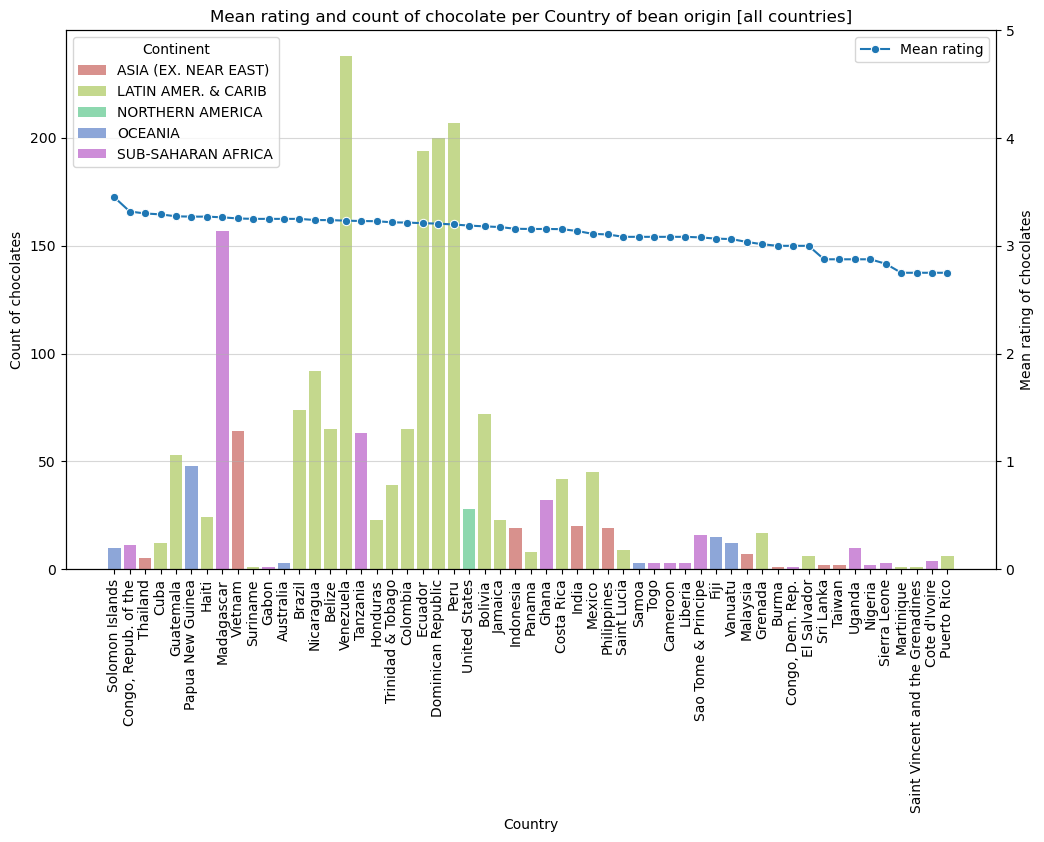

In [60]:
ax1 = sns.set_style(style=None) #, rc=None)

fig, ax1 = plt.subplots(figsize=(12,7))

plt.grid(axis='y', alpha=0.5)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Mean rating and count of chocolate per Country of bean origin [all countries]')
sns.barplot(data = df_country_mean_median, x='Country', y='count', alpha=0.75, ax=ax1, hue='Continent', 
            dodge=False, palette='hls', hue_order=ordered_continents)
sns.move_legend(ax1, 'upper left')
ax1.set_ylabel('Count of chocolates')
ax2 = ax1.twinx()
sns.lineplot(data = df_country_mean_median, x='Country', y='mean', marker='o', ax=ax2, label='Mean rating')
sns.move_legend(ax2, 'upper right')
ax2.set_ylabel('Mean rating of chocolates')
ax2.set_ylim([0, 5])
plt.show()

Best chocolates are from beans that came from Solomon Islands, then Congo, then Thailand. But we see that there are only few chocolates made from this beans - most origin from South America or African Island - Madagascar, what can be seen on maps shown below. First let's take a look on a plot that takes data only for countries of bean origin that are added to 10 or more chocolates.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


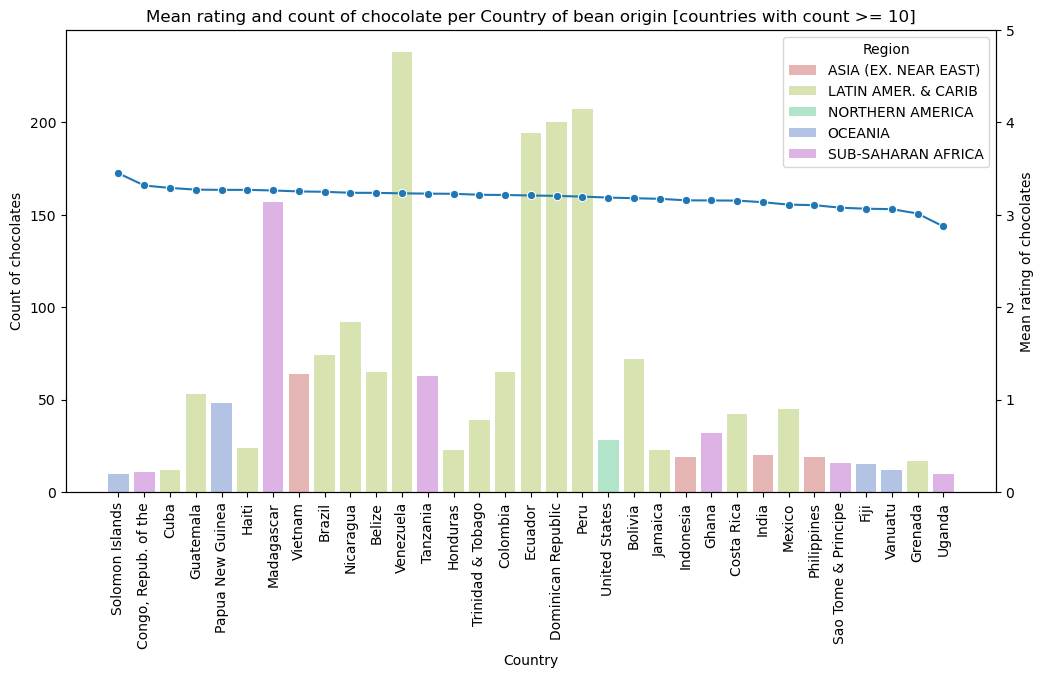

In [22]:
df_country_mean_median_10 = df_country_mean_median[df_country_mean_median['count'] >= 10]
ax3 = sns.set_style(style=None) #, rc=None)

fig, ax3 = plt.subplots(figsize=(12,6))
ax3.tick_params(axis='x', rotation=90)
ax3.set_title('Mean rating and count of chocolate per Country of bean origin [countries with count >= 10]')
sns.barplot(data = df_country_mean_median_10, x='Country', y='count', alpha=0.5, ax=ax3, hue='Region', dodge=False, palette='hls', hue_order=ordered_continents)
ax3.set_ylabel('Count of chocolates')
ax4 = ax3.twinx()
sns.lineplot(data = df_country_mean_median_10, x='Country', y='mean', marker='o', ax=ax4)
ax4.set_ylabel('Mean rating of chocolates')
ax4.set_ylim([0, 5])
plt.show()

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


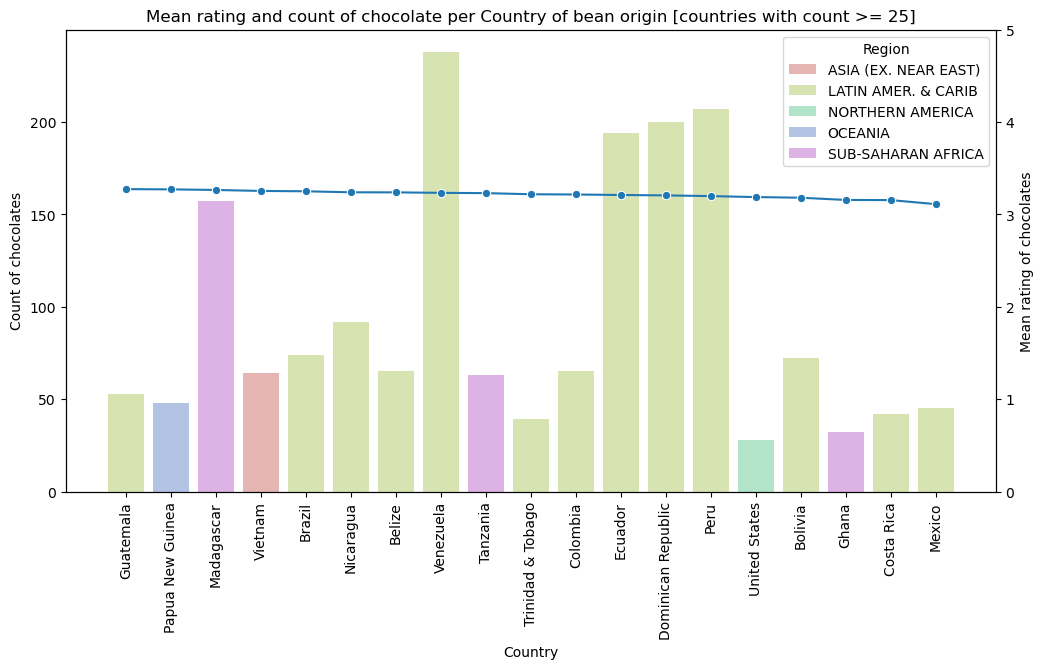

In [23]:
df_country_mean_median_25 = df_country_mean_median[df_country_mean_median['count'] >= 25]
ax3 = sns.set_style(style=None) #, rc=None)

fig, ax3 = plt.subplots(figsize=(12,6))
ax3.tick_params(axis='x', rotation=90)
ax3.set_title('Mean rating and count of chocolate per Country of bean origin [countries with count >= 25]')
sns.barplot(data = df_country_mean_median_25, x='Country', y='count', alpha=0.5, ax=ax3, hue='Region', dodge=False, palette='hls', hue_order=ordered_continents)
ax3.set_ylabel('Count of chocolates')
ax4 = ax3.twinx()
sns.lineplot(data = df_country_mean_median_25, x='Country', y='mean', marker='o', ax=ax4)
ax4.set_ylabel('Mean rating of chocolates')
ax4.set_ylim([0, 5])
plt.show()

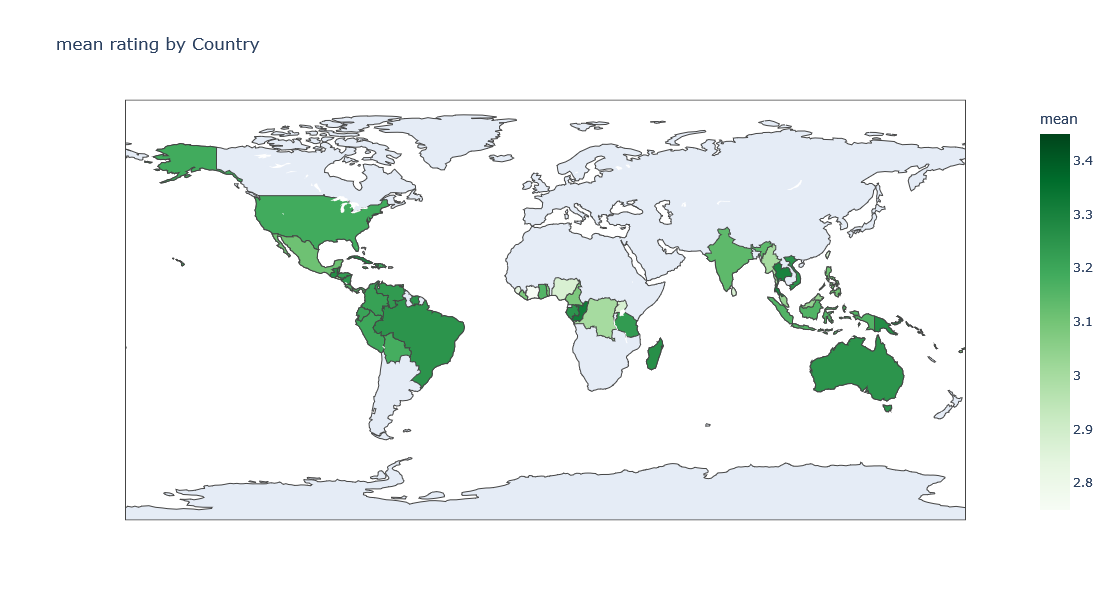

In [24]:
import plotly.express as px


fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='mean', hover_name='Country',
                    color_continuous_scale='greens',
                    title='mean rating by Country',
                    width=1000,
                    height=600
                    )
fig.show()

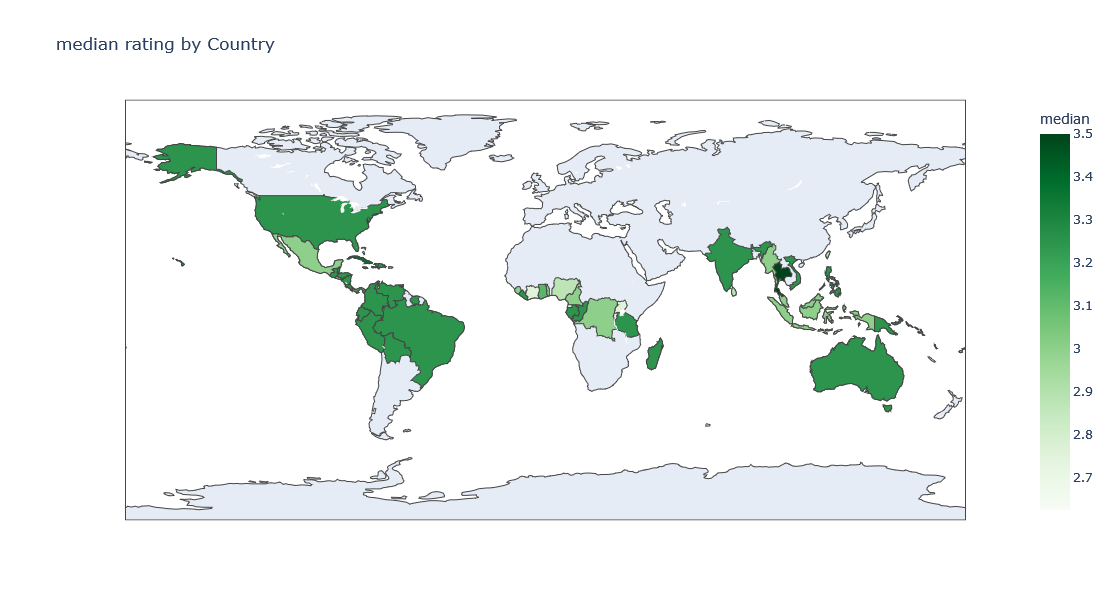

In [25]:

fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='median', hover_name='Country',
                    color_continuous_scale='greens',
                    title='median rating by Country',
                    width=1000,
                    height=600)
fig.show()

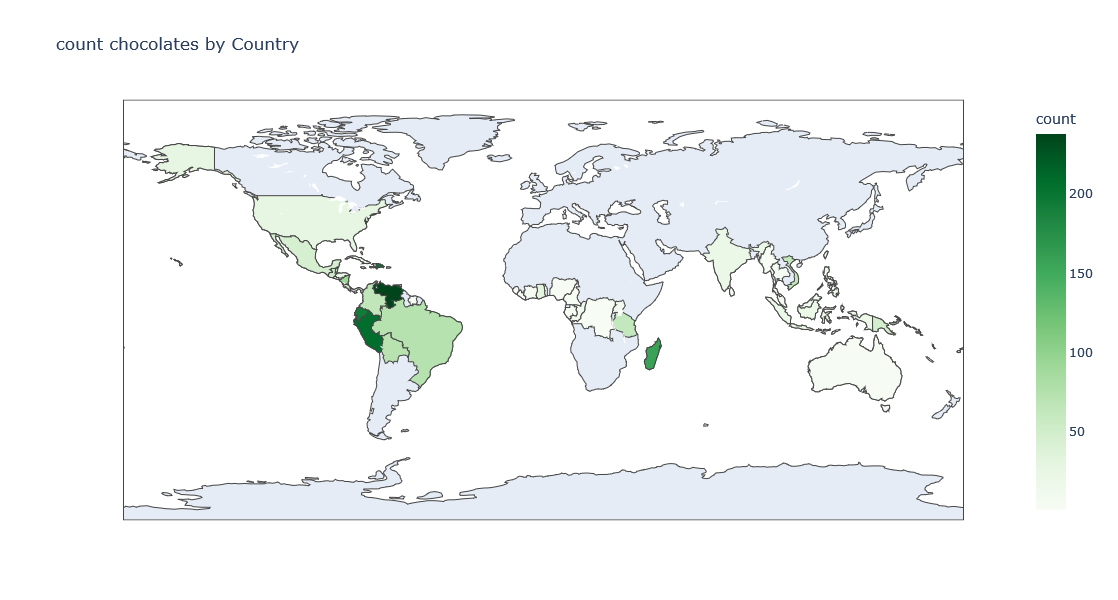

In [26]:
fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='count', hover_name='Country',
                    color_continuous_scale='greens',
                    title='count chocolates by Country',
                    width=1000,
                    height=600)
fig.show()

To sum up, the worst quality we get when the beans of cacao is mixed. Otherwise there is no big impact on the quality of chocolate -> for each continent median is the same and mean for the continent with the lowest mean value is 1,27 % less from the mean for continent with the highest mean value. From map we can conclude that Africa may produce worse quality beans, but there are few chocolates with cocoa beans that come from here. Except for Congo and Madagascar which give excellent chocolates. \
Most beans are raised in South America. Also, when looking at chart with mean rating for the country, it is clear that it is quite flat one with Solomon Islands on top and Puerto Rico at the end. When considering beans from countries with high count of chocolates that come from it is clear that they come mainly from South America.

Below there is a small analysis for chocolates with ratings >= 3.5. 

In [27]:
df_bean_origin_merge_3_5 = df_bean_origin_merge[df_bean_origin_merge['rating'] >= 3.5]
df_bean_origin_merge_3_5.head()

Country  rating              Region
0   Madagascar    3.75  SUB-SAHARAN AFRICA
4   Madagascar    3.50  SUB-SAHARAN AFRICA
8   Madagascar    3.50  SUB-SAHARAN AFRICA
11  Madagascar    3.75  SUB-SAHARAN AFRICA
12  Madagascar    3.75  SUB-SAHARAN AFRICA

In [28]:
df_bean_origin_regions_3_5 = (df_bean_origin_merge_3_5
                          .groupby('Region')
                          .agg(
                                 mean=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('mean', ascending=False)
                          .reset_index()
                         )
df_bean_origin_regions_3_5

Region      mean  median  count
0   LATIN AMER. & CARIB  3.640625     3.5    592
1               OCEANIA  3.639706     3.5     34
2    SUB-SAHARAN AFRICA  3.633197     3.5    122
3      NORTHERN AMERICA  3.613636     3.5     11
4  ASIA (EX. NEAR EAST)  3.569149     3.5     47

In [29]:
df_bean_origin_countries_3_5 = (df_bean_origin_merge_3_5
                                .groupby('Country')
                                .agg(
                                 mean=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values(by=['mean', 'count'], ascending=[False, False])
                          .reset_index()
                               )
df_bean_origin_countries_3_5 = df_bean_origin_countries_3_5.merge(df_countries, on='Country')
df_bean_origin_countries_3_5.head(5)

Country      mean  median  count                Region
0      Jamaica  3.750000    3.75      6   LATIN AMER. & CARIB
1  Saint Lucia  3.750000    3.75      2   LATIN AMER. & CARIB
2    Australia  3.750000    3.75      1               OCEANIA
3       Mexico  3.708333    3.75     12   LATIN AMER. & CARIB
4    Indonesia  3.708333    3.75      6  ASIA (EX. NEAR EAST)

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



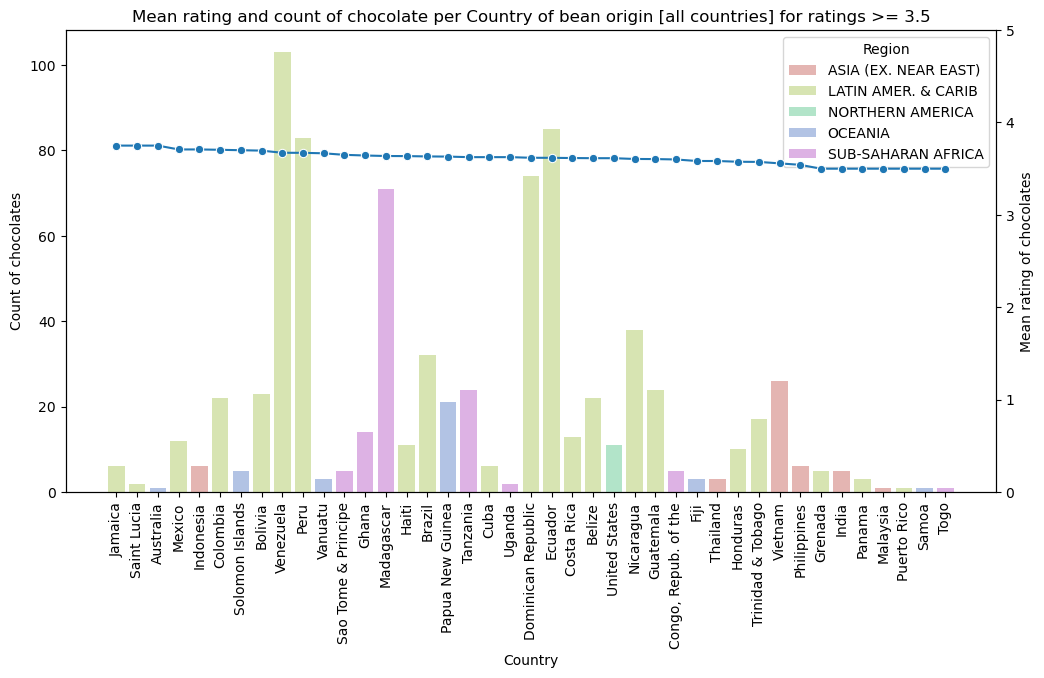

In [30]:
ax1 = sns.set_style(style=None) #, rc=None)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Mean rating and count of chocolate per Country of bean origin [all countries] for ratings >= 3.5')
sns.barplot(data = df_bean_origin_countries_3_5, x='Country', y='count', alpha=0.5, ax=ax1, hue='Region', 
            dodge=False, palette='hls', hue_order=ordered_continents)
ax1.set_ylabel('Count of chocolates')
ax2 = ax1.twinx()
sns.lineplot(data = df_bean_origin_countries_3_5, x='Country', y='mean', marker='o', ax=ax2)
ax2.set_ylabel('Mean rating of chocolates')
ax2.set_ylim([0, 5])
plt.show()

This plot shows how many of chocolates with ratings >= 3.5 origin from which country.

## Attempt to answer a question:
5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

In [31]:
# get the needed data
df_cocoa_percent_rating__for_boxplot = df[['ref', 'company', 'specific_bean_origin_or_bar_name', 'cocoa_percent', 'rating']]

In [32]:
df_cocoa_percent_rating__for_boxplot.head()

ref   company specific_bean_origin_or_bar_name  cocoa_percent  rating
0  2454      5150           Bejofo Estate, batch 1           76.0    3.75
1  2458      5150                  Zorzal, batch 1           76.0    3.50
2  2454      5150            Kokoa Kamili, batch 1           76.0    3.25
3   797  A. Morin                             Peru           63.0    3.75
4   797  A. Morin                          Bolivia           70.0    3.50

In [33]:
df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= 50, 'range'] = ' < 50'
for k in range(50, 100, 10):
    df_cocoa_percent_rating__for_boxplot.loc[np.logical_and(k < df_cocoa_percent_rating__for_boxplot['cocoa_percent'], 
                                              df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= k + 10), 'range'] = str(k) + '-' + str(k+10)
df_cocoa_percent_rating__for_boxplot.head()

C:\Users\Dom\AppData\Local\Temp\ipykernel_18636\1464013348.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ref   company specific_bean_origin_or_bar_name  cocoa_percent  rating  \
0  2454      5150           Bejofo Estate, batch 1           76.0    3.75   
1  2458      5150                  Zorzal, batch 1           76.0    3.50   
2  2454      5150            Kokoa Kamili, batch 1           76.0    3.25   
3   797  A. Morin                             Peru           63.0    3.75   
4   797  A. Morin                          Bolivia           70.0    3.50   

   range  
0  70-80  
1  70-80  
2  70-80  
3  60-70  
4  60-70

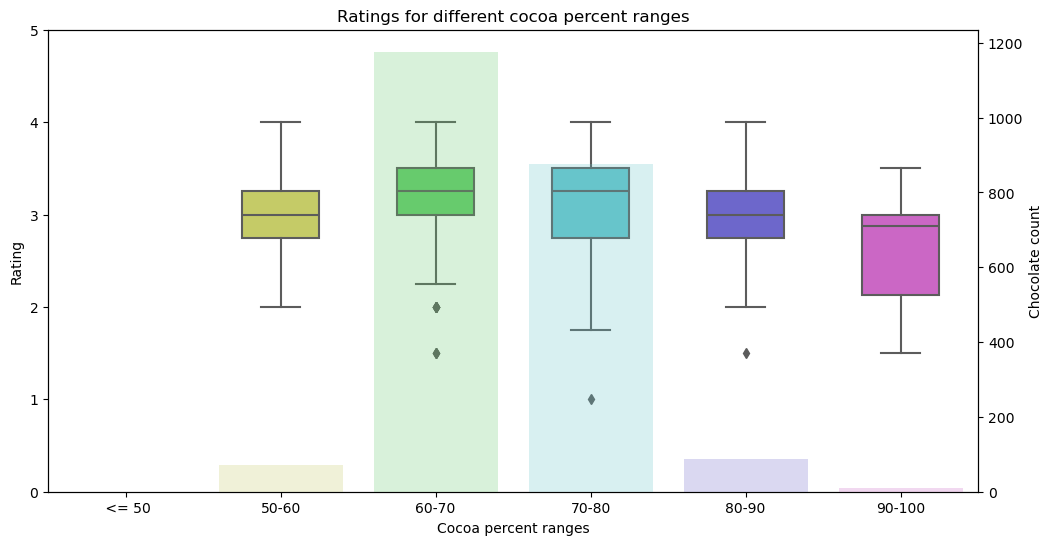

In [34]:
ax = sns.set_style(style=None) #, rc=None)
ranges_order = [' <= 50', '50-60', '60-70', '70-80', '80-90', '90-100']
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="range", y="rating", data=df_cocoa_percent_rating__for_boxplot, order=ranges_order, palette='hls', width=0.5)
ax.set_title('Ratings for different cocoa percent ranges')
ax.set_ylabel('Rating')
ax.set_ylim([0,5])
ax.set_xlabel('Cocoa percent ranges')
ax2 = ax.twinx()
sns.countplot(data = df_cocoa_percent_rating__for_boxplot, x='range', alpha=0.25, ax=ax2, palette='hls', order=ranges_order)
ax2.set_ylabel('Chocolate count')
#for container in ax2.containers:
#    ax2.bar_label(container)
plt.show()

So we see, that chocolates with cocoa percent in range 60-80 generally have higher ratings than other chocolates. They are also most numerous.
Let's see if anythong changes if we change the ranges to smaller ones. \
Ranges include bigger number, exclude smaller one, ex. 50-60: 50 < range <= 60. Otherwise chocolates with 100 % cocoa would be excluded from analysis.


In [35]:
df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= 50, 'range_2'] = ' <= 50'
for k in range(50, 100, 5):
    df_cocoa_percent_rating__for_boxplot.loc[np.logical_and(k < df_cocoa_percent_rating__for_boxplot['cocoa_percent'], 
                                              df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= k + 5), 'range_2'] = str(k) + '-' + str(k+5)
df_cocoa_percent_rating__for_boxplot.head()

C:\Users\Dom\AppData\Local\Temp\ipykernel_18636\133676325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ref   company specific_bean_origin_or_bar_name  cocoa_percent  rating  \
0  2454      5150           Bejofo Estate, batch 1           76.0    3.75   
1  2458      5150                  Zorzal, batch 1           76.0    3.50   
2  2454      5150            Kokoa Kamili, batch 1           76.0    3.25   
3   797  A. Morin                             Peru           63.0    3.75   
4   797  A. Morin                          Bolivia           70.0    3.50   

   range range_2  
0  70-80   75-80  
1  70-80   75-80  
2  70-80   75-80  
3  60-70   60-65  
4  60-70   65-70

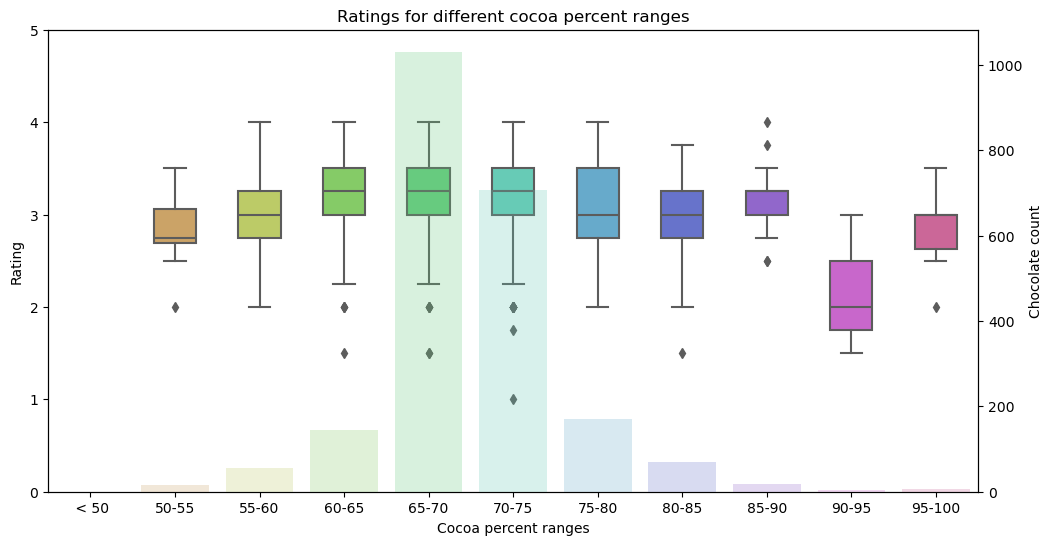

In [36]:
ax = sns.set_style(style=None) #, rc=None)
ranges_order_2 = [' < 50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x="range_2", y="rating", data=df_cocoa_percent_rating__for_boxplot, order=ranges_order_2, palette='hls', width=0.5)
ax.set_title('Ratings for different cocoa percent ranges')
ax.set_ylabel('Rating')
ax.set_ylim([0,5])
ax.set_xlabel('Cocoa percent ranges')
ax2 = ax.twinx()
sns.countplot(data = df_cocoa_percent_rating__for_boxplot, x='range_2', alpha=0.25, ax=ax2, palette='hls', order=ranges_order_2)
ax2.set_ylabel('Chocolate count')
plt.show()

Most of the chocolates have cocoa percent 65-70. So maybe let's take a look at this range and we will be done with this analysis. 
Coclusion so far: the tester like most chocolate with cocoa percent 60-80. 

In [37]:
number_of_chocolates = (df_cocoa_percent_rating__for_boxplot
                                      .groupby('range_2')
                                      .agg(
                                              count=('range_2', 'count')
                                          )
                                      .sort_values(by='range_2')
                                      .reset_index()
                         )
number_of_chocolates.head()

range_2  count
0   <= 50      3
1   50-55     16
2   55-60     55
3   60-65    145
4   65-70   1031

In [38]:
number_of_chocolates['percent_of_total_chocolates'] = np.round(number_of_chocolates['count'] / sum(number_of_chocolates['count']) * 100, 2)
number_of_chocolates.head()

range_2  count  percent_of_total_chocolates
0   <= 50      3                         0.13
1   50-55     16                         0.72
2   55-60     55                         2.47
3   60-65    145                         6.52
4   65-70   1031                        46.36

In [39]:
print(number_of_chocolates.loc[number_of_chocolates['range_2'].isin(['70-75', '65-70']), ['range_2', 'percent_of_total_chocolates']])

  range_2  percent_of_total_chocolates
4   65-70                        46.36
5   70-75                        31.74


In [40]:
df_cocoa_65_75 = df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['range_2'].isin(['70-75', '65-70'])]
df_cocoa_65_75.head()

ref   company specific_bean_origin_or_bar_name  cocoa_percent  rating  \
4   797  A. Morin                          Bolivia           70.0    3.50   
5  1015  A. Morin                            Chuao           70.0    4.00   
7  1011  A. Morin                         Equateur           70.0    3.75   
8  1019  A. Morin             Chanchamayo Province           70.0    3.50   
9  1011  A. Morin                           Brazil           70.0    3.25   

   range range_2  
4  60-70   65-70  
5  60-70   65-70  
7  60-70   65-70  
8  60-70   65-70  
9  60-70   65-70

In [41]:
sns.boxplot(x="cocoa_percent", y="rating", data=df_cocoa_70_75, order=sorted(df_cocoa_70_75['cocoa_percent'].unique()))
plt.show()
# TODO

NameError: name 'df_cocoa_70_75' is not defined

In [ ]:
df_cocoa_70_75.groupby('cocoa_percent').agg(count=('rating', 'count'))

In [ ]:
most_frequent_chocolates = (df_cocoa_percent_rating__for_boxplot
                                    .groupby('cocoa_percent')
                                    .agg(count=('rating', 'count'))
                                    .sort_values('count', ascending=False)
                                    .reset_index()
                                    .head(10)
                           )
most_frequent_chocolates['percent_of_all_reviewed_chocolates'] = round(most_frequent_chocolates['count'] / sum(number_of_chocolates['count']) * 100, 2)
most_frequent_chocolates

Let's take a look at boxplots for top 3 of most frequent cocoa percents.

In [ ]:
chocolates_70_75_72 = df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['cocoa_percent'].isin([70, 75, 72])]
sns.boxplot(x='cocoa_percent', y='rating', data=chocolates_70_75_72)
plt.show()

In this dataset most number of chocolates have 70-75 % cocoa (nearly 60 % of the dataset). - to verify

In [ ]:
df_cocoa_percent_rating = (df
                          .groupby('cocoa_percent')
                          .agg(
                                 mean=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 min=('rating', 'min'),
                                 max=('rating', 'max'),
                                 count=('rating', 'count')
                              )
                          .sort_values('cocoa_percent', ascending=True)
                          .reset_index()
                         )
df_cocoa_percent_rating

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_cocoa_percent_rating['cocoa_percent'], df_cocoa_percent_rating['mean'], color='r')
ax.plot(df_cocoa_percent_rating['cocoa_percent'], df_cocoa_percent_rating['median'], color='b')
ax.set(xlabel='Cocoa percent [%]', ylabel='Rating 1-5', title='Cocoa percent vs rating')
plt.show()

## Attempt to answer a question:
6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [ ]:
sns.boxplot(x='lecithin', y='rating', data=df)
plt.show()

It seems that chocolate without lecithin is more delicious than chocolates including lecithin.

## Attempt to answer a question:
7. Which countries produce the highest rated bars?
8. Who creates the best chocolate bars?
9. Which company has highest rate?

## Attempt to answer a question:
10. What is tester's favourite taste of chocolate?

## SUMMARY